<a href="https://colab.research.google.com/github/renzasprec/LoanApproval/blob/wip%2Ftorch/LoanApproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Libraries
import numpy as np
import pandas as pd

# Exploratory Data Analysis

## Importing Data

In [6]:
# import libraries

# importing data
import kagglehub # import data from kaggle

In [7]:
# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data", path = 'loan_data.csv')

print("Path to dataset files:", path)


100%|██████████| 3.44M/3.44M [00:00<00:00, 6.01MB/s]

Path to dataset files: /root/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1/loan_data.csv


In [8]:
# load dataset
df = pd.read_csv(path)
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

## Data Inspection

Head of the data

In [9]:
display(df.head())

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

Description of the data

In [10]:
display(df.describe())

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

Data information

In [11]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

None

Data shape

In [12]:
display(df.shape)

(45000, 14)

Unique values of the data

In [13]:
display(df.nunique())

person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

Check for missing values

In [14]:
# check if any of the data contains missing values
nas_sum = df.isna().any().sum()

print('There are {} features with missing data.'.format(nas_sum))

There are 0 features with missing data.


Getting the target variable

In [15]:
target = df.columns[-1]
print('The target variable is',target)

The target variable is loan_status


Feature names

In [16]:
feature_names = df.drop(target, axis=1).columns.to_list()

In [17]:
display(feature_names)

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'person_home_ownership',
 'loan_amnt',
 'loan_intent',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file']

Get the categorical features and the numerical features

Numerical features

In [18]:
numerical_features = df.drop(target, axis=1).select_dtypes(include=['float64','int64']).columns.to_list()
display(numerical_features)

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

Categorical features

In [19]:
categorical_features = df.drop(target, axis=1).select_dtypes(include='object').columns.to_list()
display(categorical_features)

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

## Data Analysis

In [20]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# set theme
sns.set_theme()

### Univariate Analysis

Analysis of individual variables

#### Target Variable

Distribution of the target variable

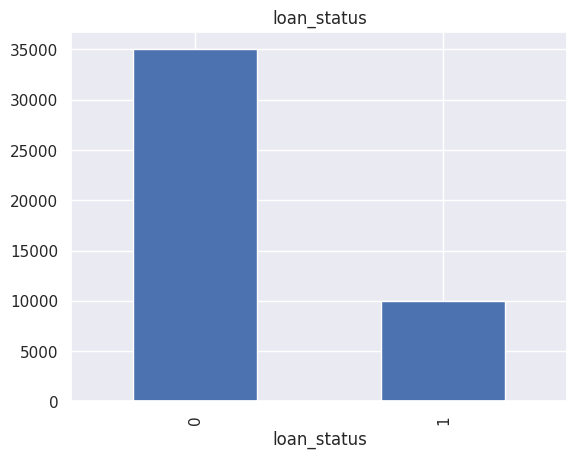

In [22]:
df[target].value_counts().plot.bar();
plt.title(target);
plt.show();

#### Numerical Features

Histograms of the numerical features

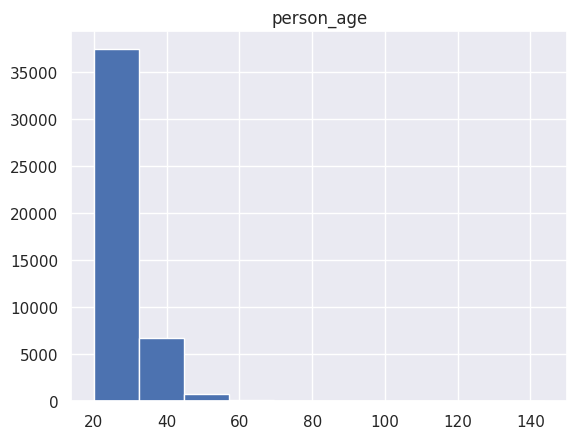

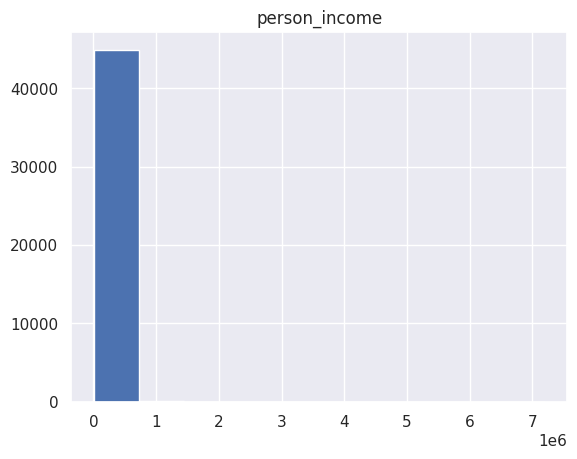

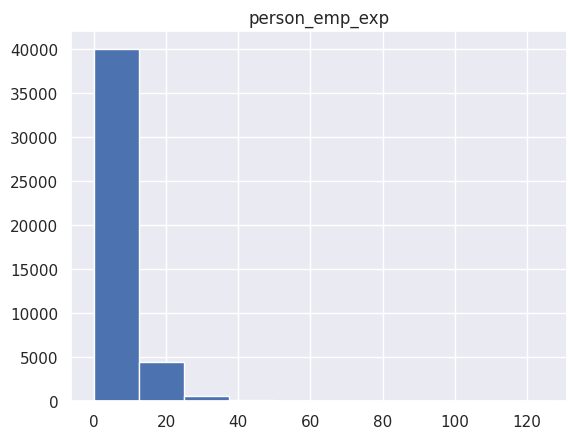

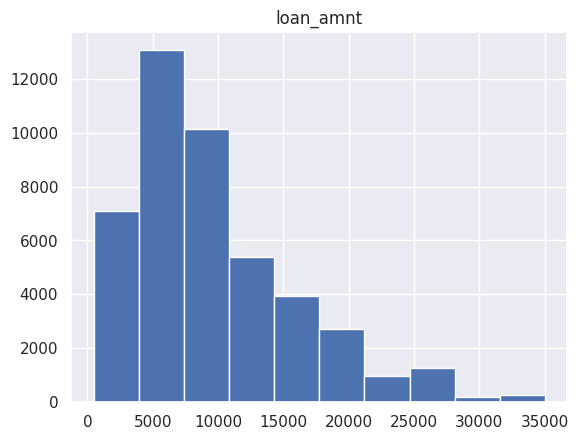

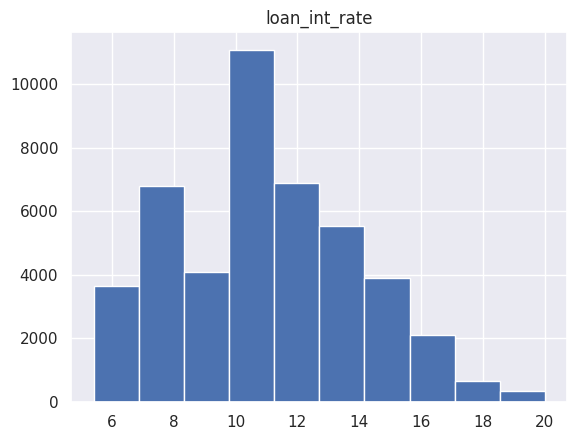

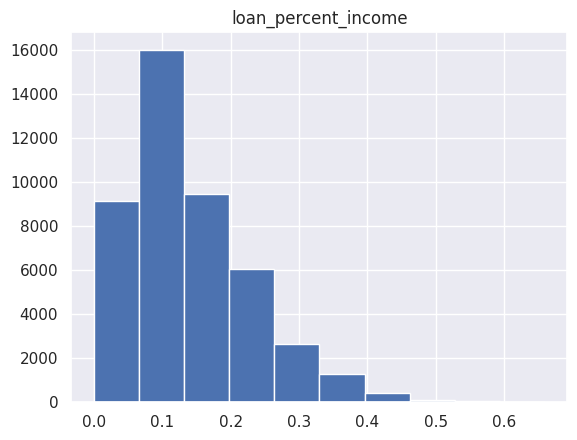

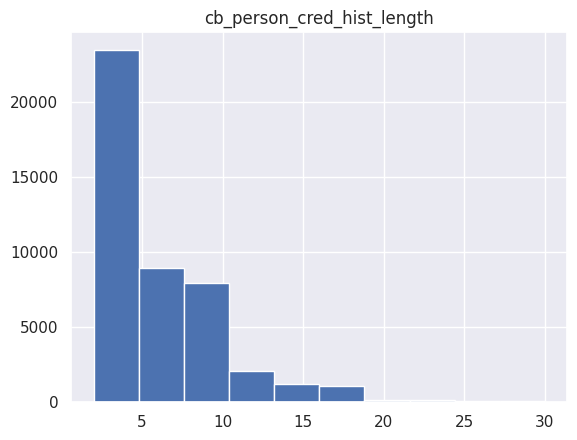

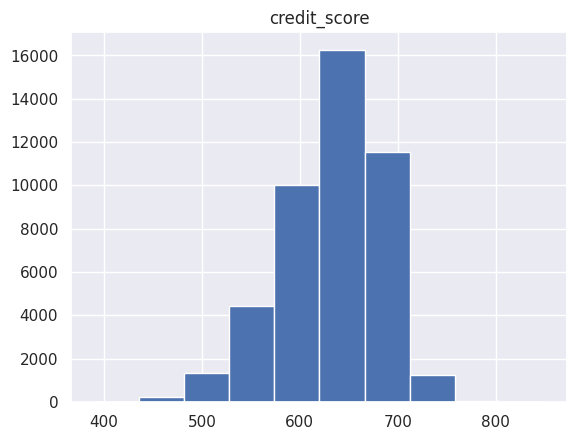

In [23]:
for feature in numerical_features:
    df[feature].hist();
    plt.title(feature);
    plt.show();

Box plots of the numerical features

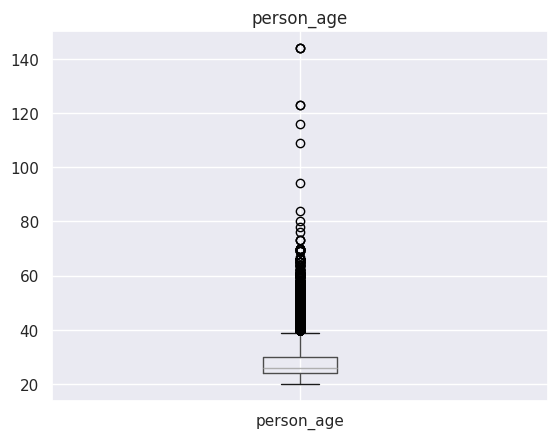

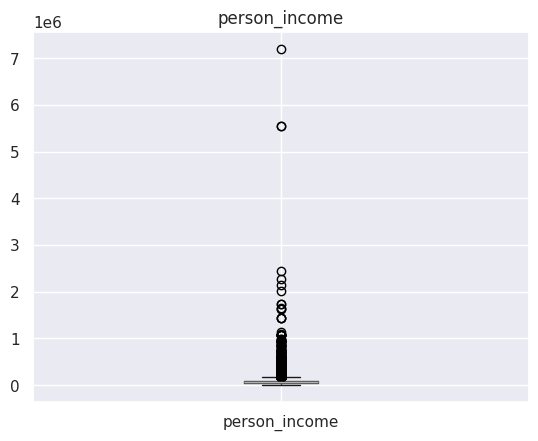

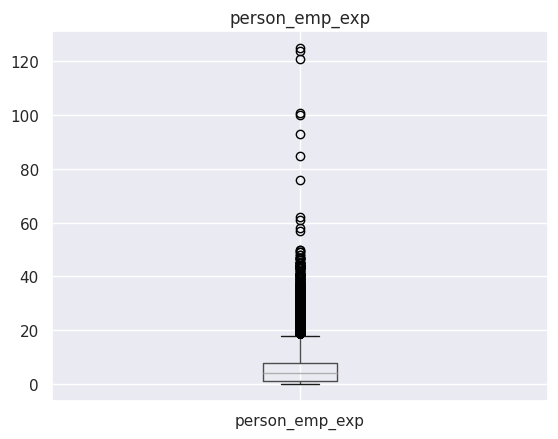

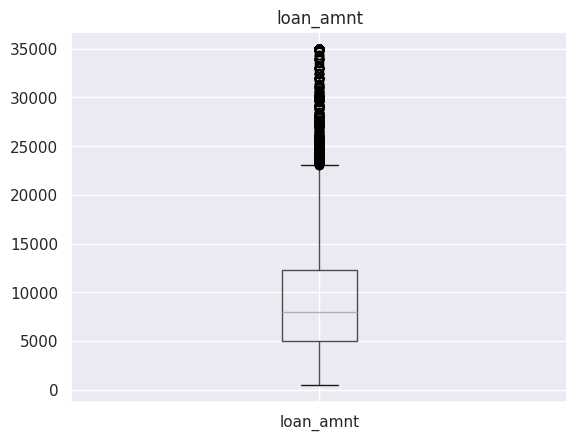

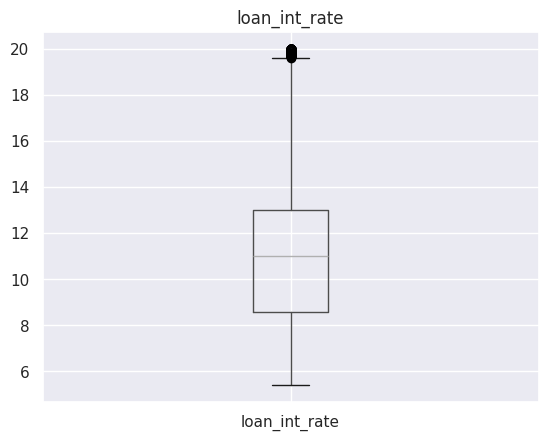

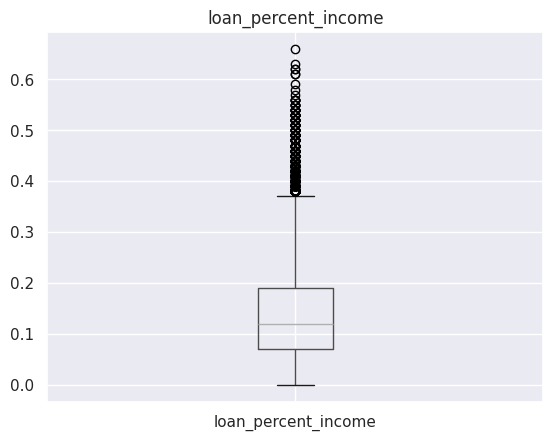

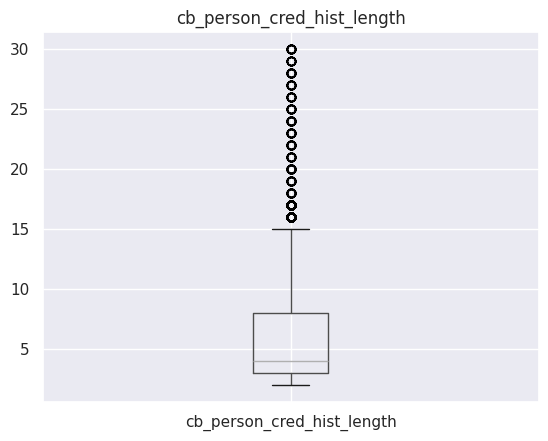

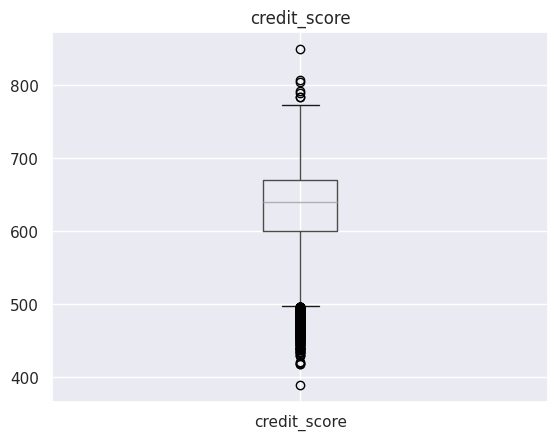

In [24]:
for feature in numerical_features:
    df[[feature]].boxplot();
    plt.title(feature);
    plt.show();

#### Categorical Feautures

Distributions of categorical features

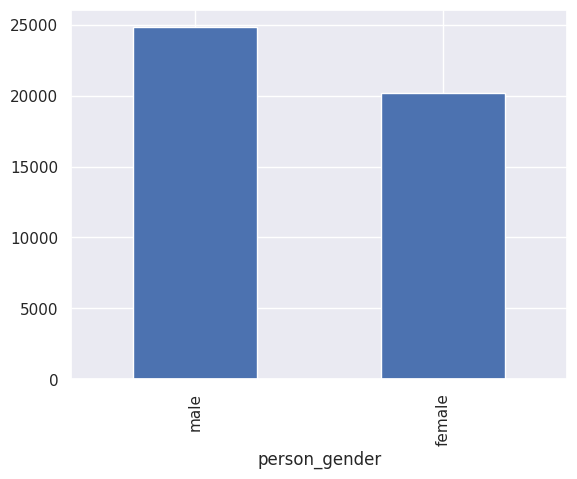

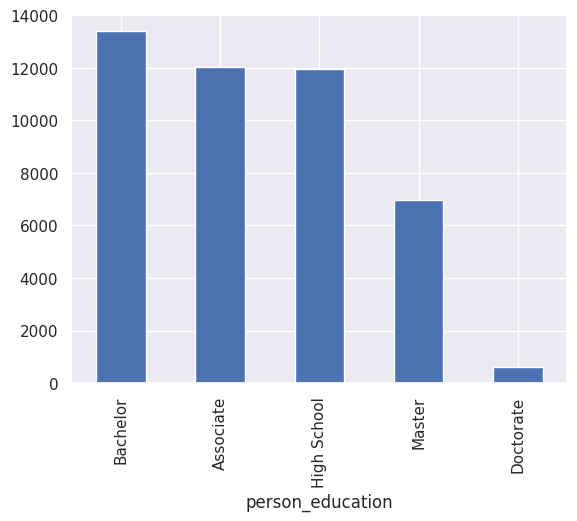

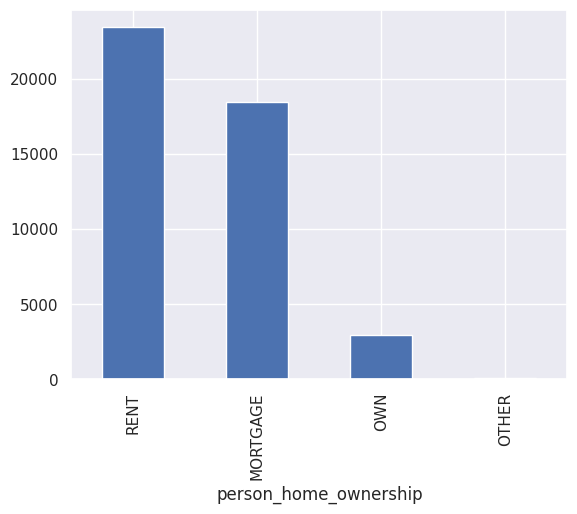

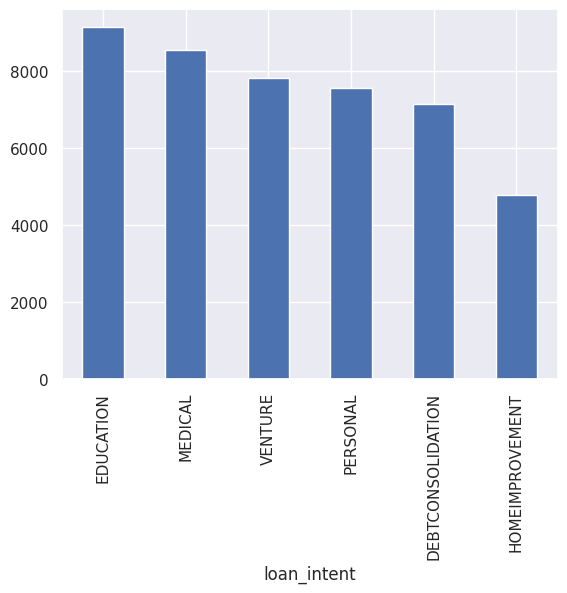

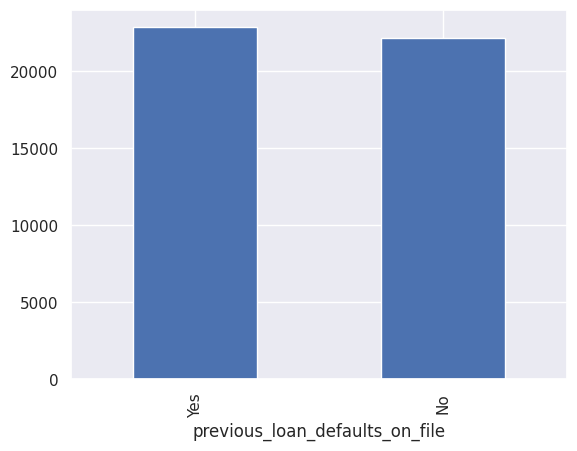

In [25]:
for feature in categorical_features:
    df[feature].value_counts().plot.bar();
    plt.xticks(rotation=90);
    plt.show();

### Bivariate Analysis

#### Numerical Features

Distribution of each numerical feature by loan status

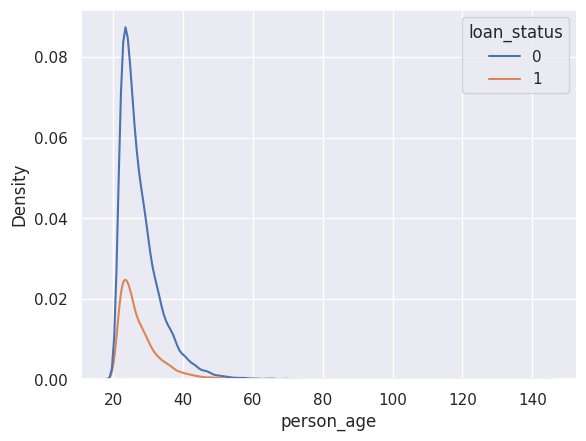

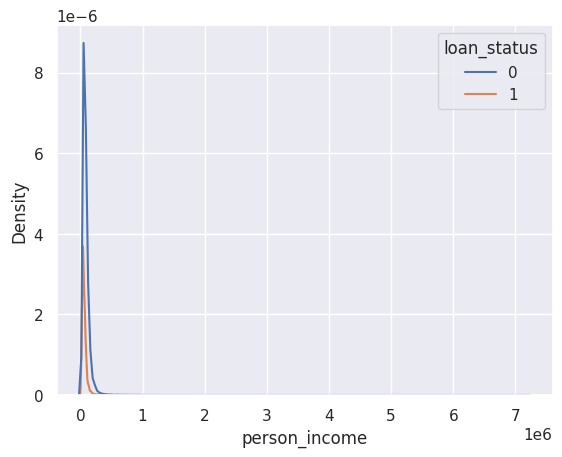

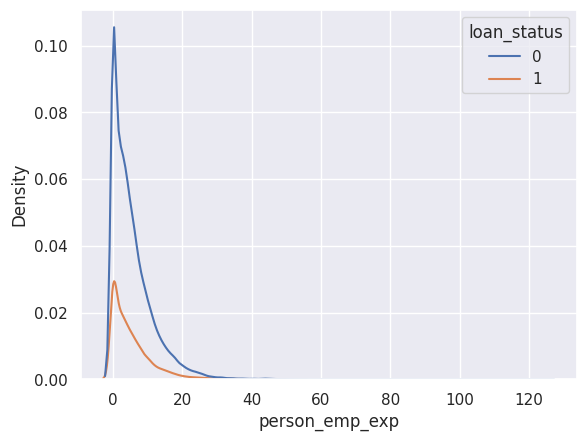

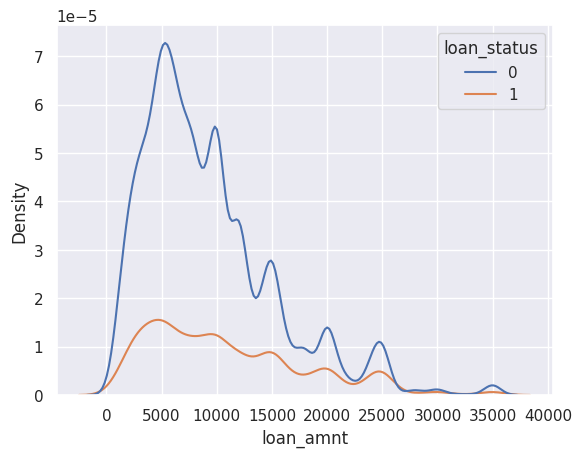

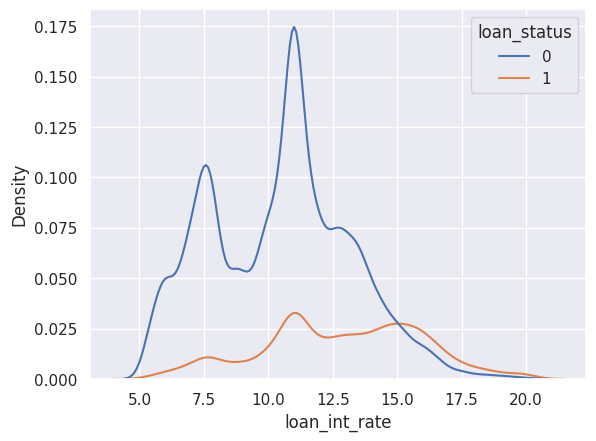

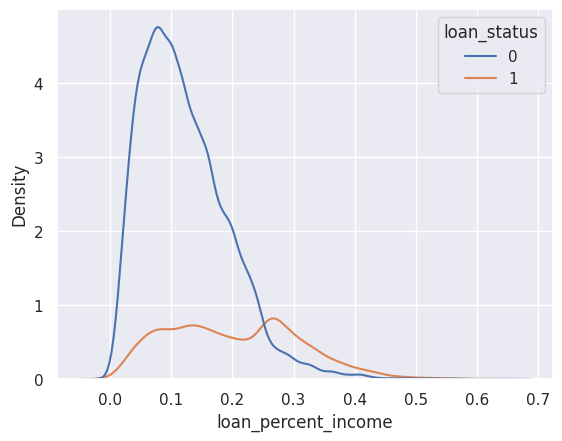

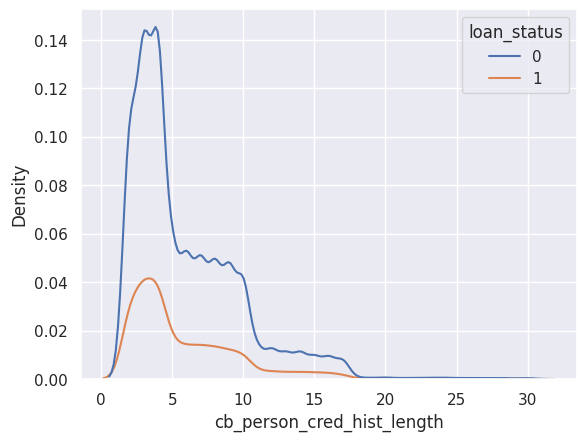

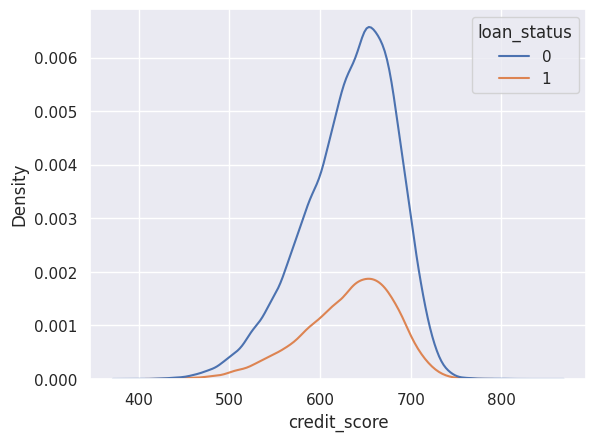

In [26]:
for feature in numerical_features:
        sns.kdeplot(data=df,x=feature,hue=target);
        plt.show();

Boxplots of each numerical feature by loan status

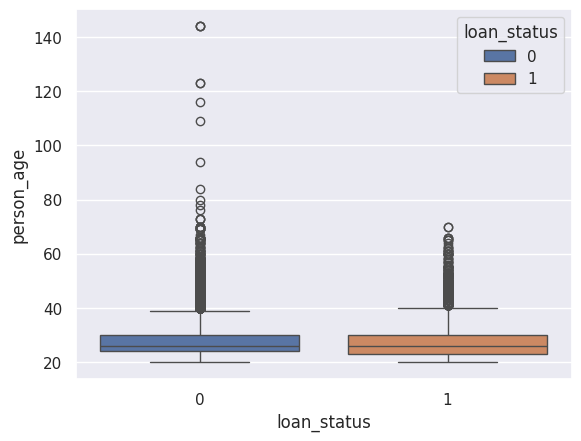

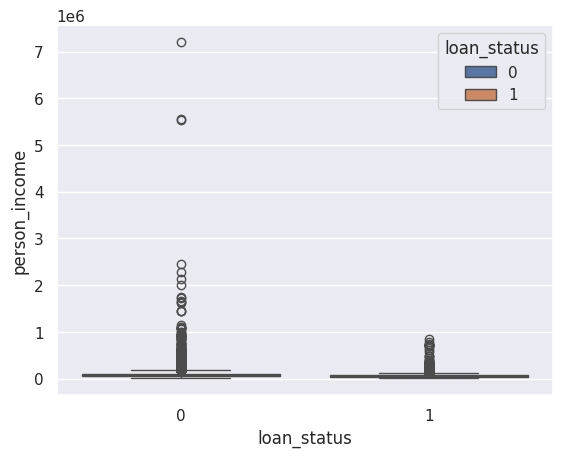

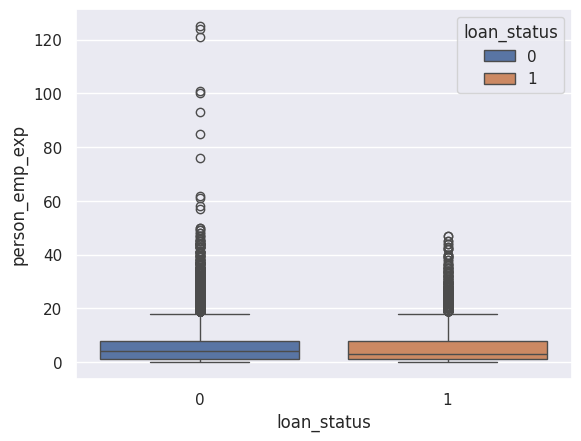

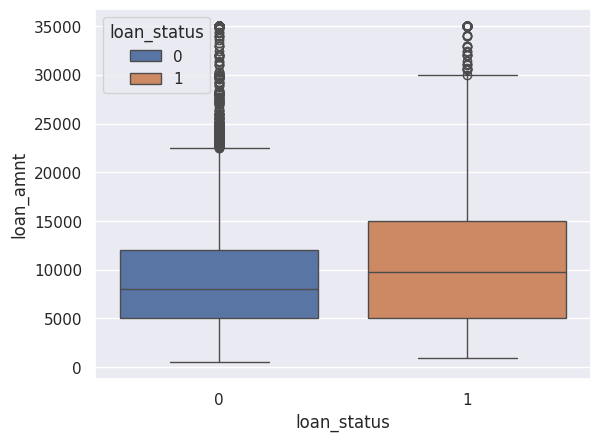

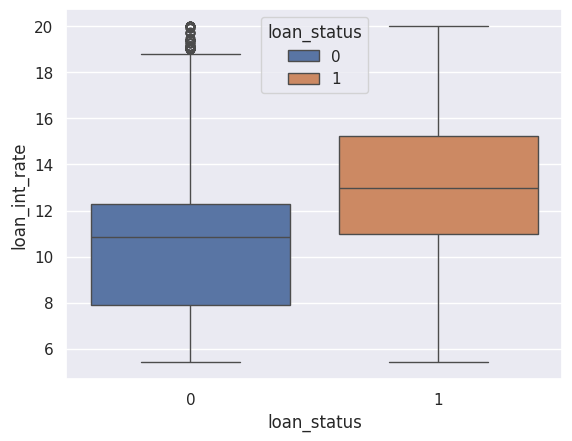

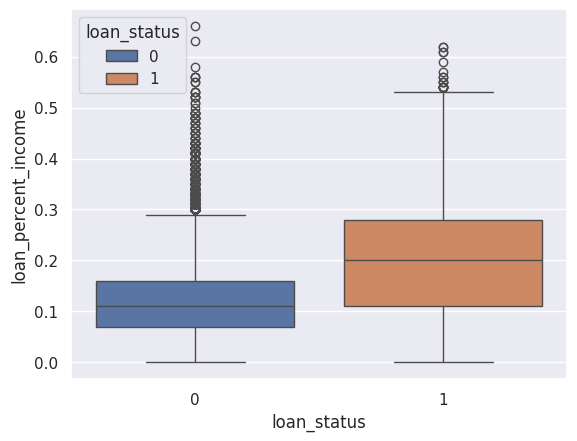

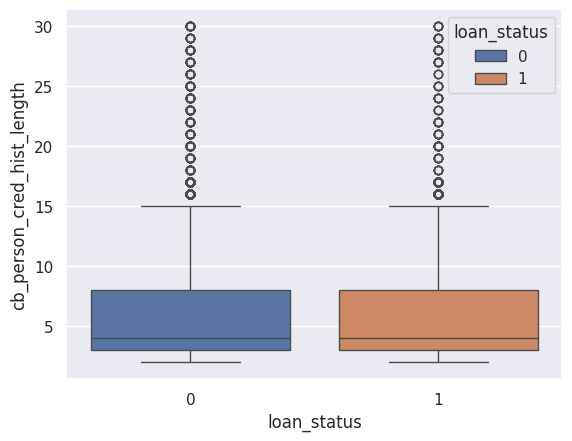

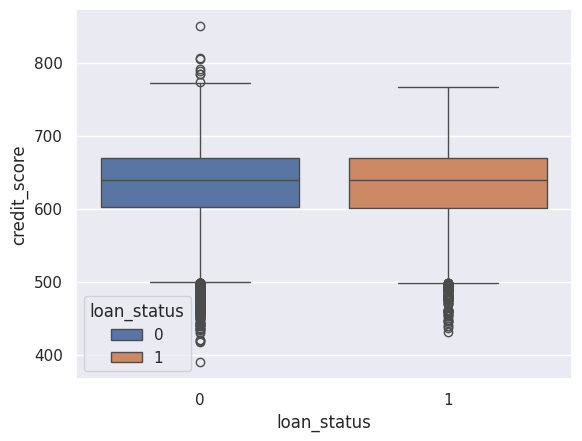

In [27]:
for feature in numerical_features:
    sns.boxplot(data=df,y=feature,x=target,hue=target);
    plt.show();

Cross tabulation of each categorical feature against the target variable, loan_status.

In [28]:
for feature in categorical_features:
    display(pd.crosstab(df[feature],df[target]))

loan_status        0     1
person_gender             
female         15674  4485
male           19326  5515

loan_status           0     1
person_education             
Associate          9378  2650
Bachelor          10381  3018
Doctorate           479   142
High School        9301  2671
Master             5461  1519

loan_status                0     1
person_home_ownership             
MORTGAGE               16345  2144
OTHER                     78    39
OWN                     2729   222
RENT                   15848  7595

loan_status           0     1
loan_intent                  
DEBTCONSOLIDATION  4982  2163
EDUCATION          7601  1552
HOMEIMPROVEMENT    3525  1258
MEDICAL            6170  2378
PERSONAL           6031  1521
VENTURE            6691  1128

loan_status                         0      1
previous_loan_defaults_on_file              
No                              12142  10000
Yes                             22858      0

#### Categorical Features

Plot of each categorical features grouped by loan status

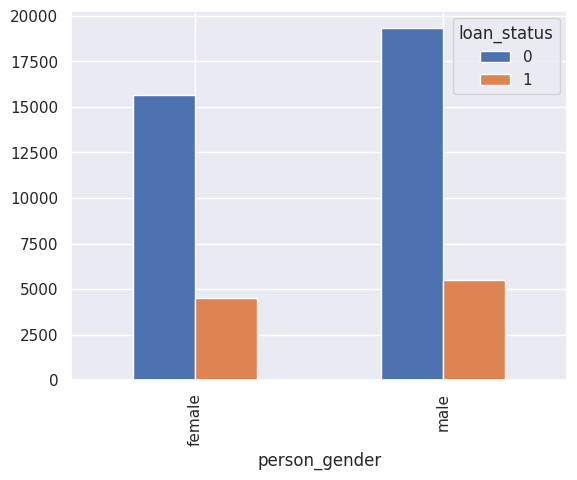

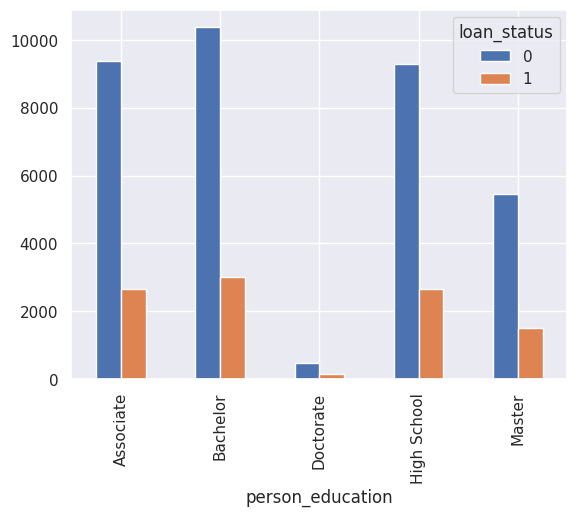

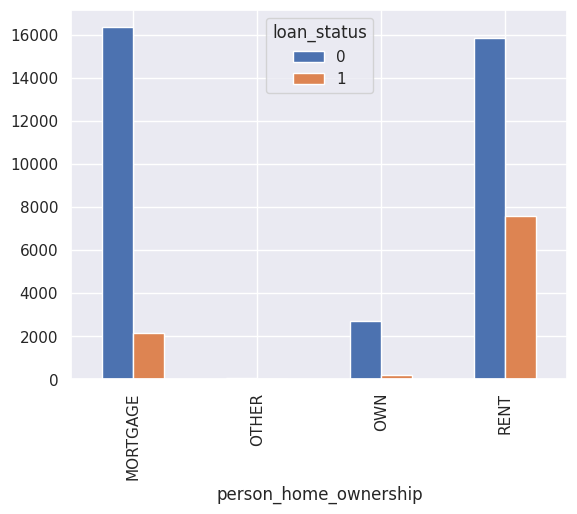

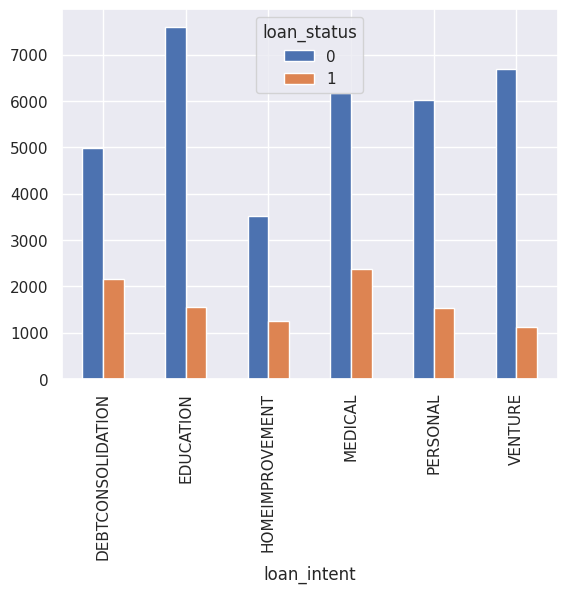

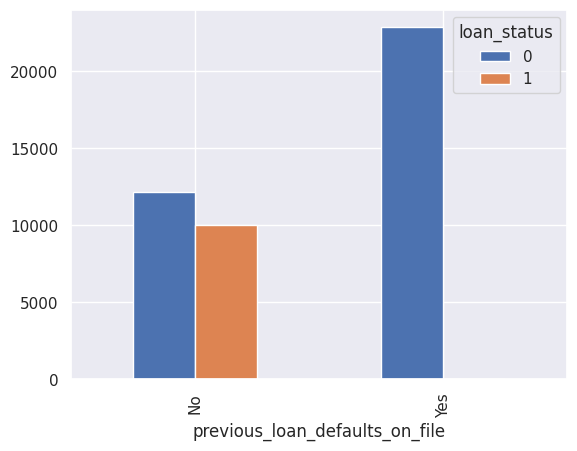

In [29]:
for feature in categorical_features:
    pd.crosstab(df[feature],df[target]).plot.bar()
    plt.show();

### Multivariate Analysis

Analysis of multiple variables

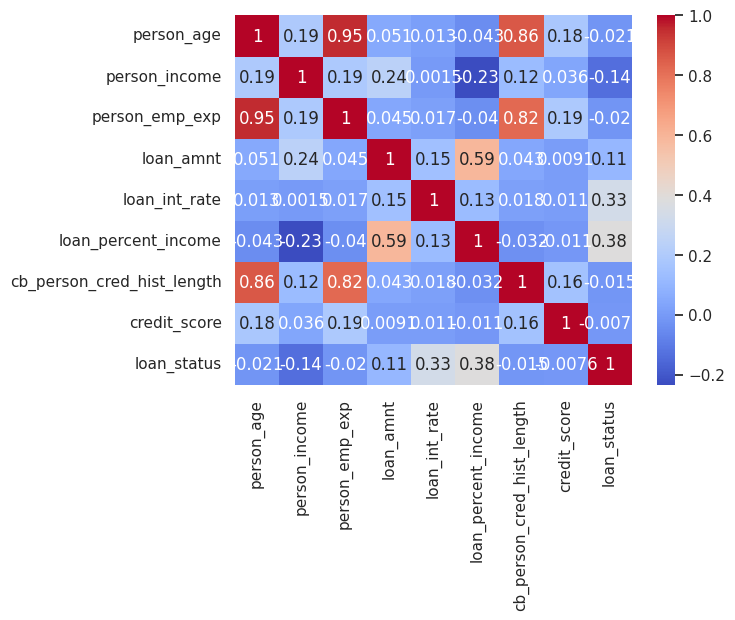

In [30]:
# correlation matrix
corr= df.corr(numeric_only=True)

# plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm');
plt.show();

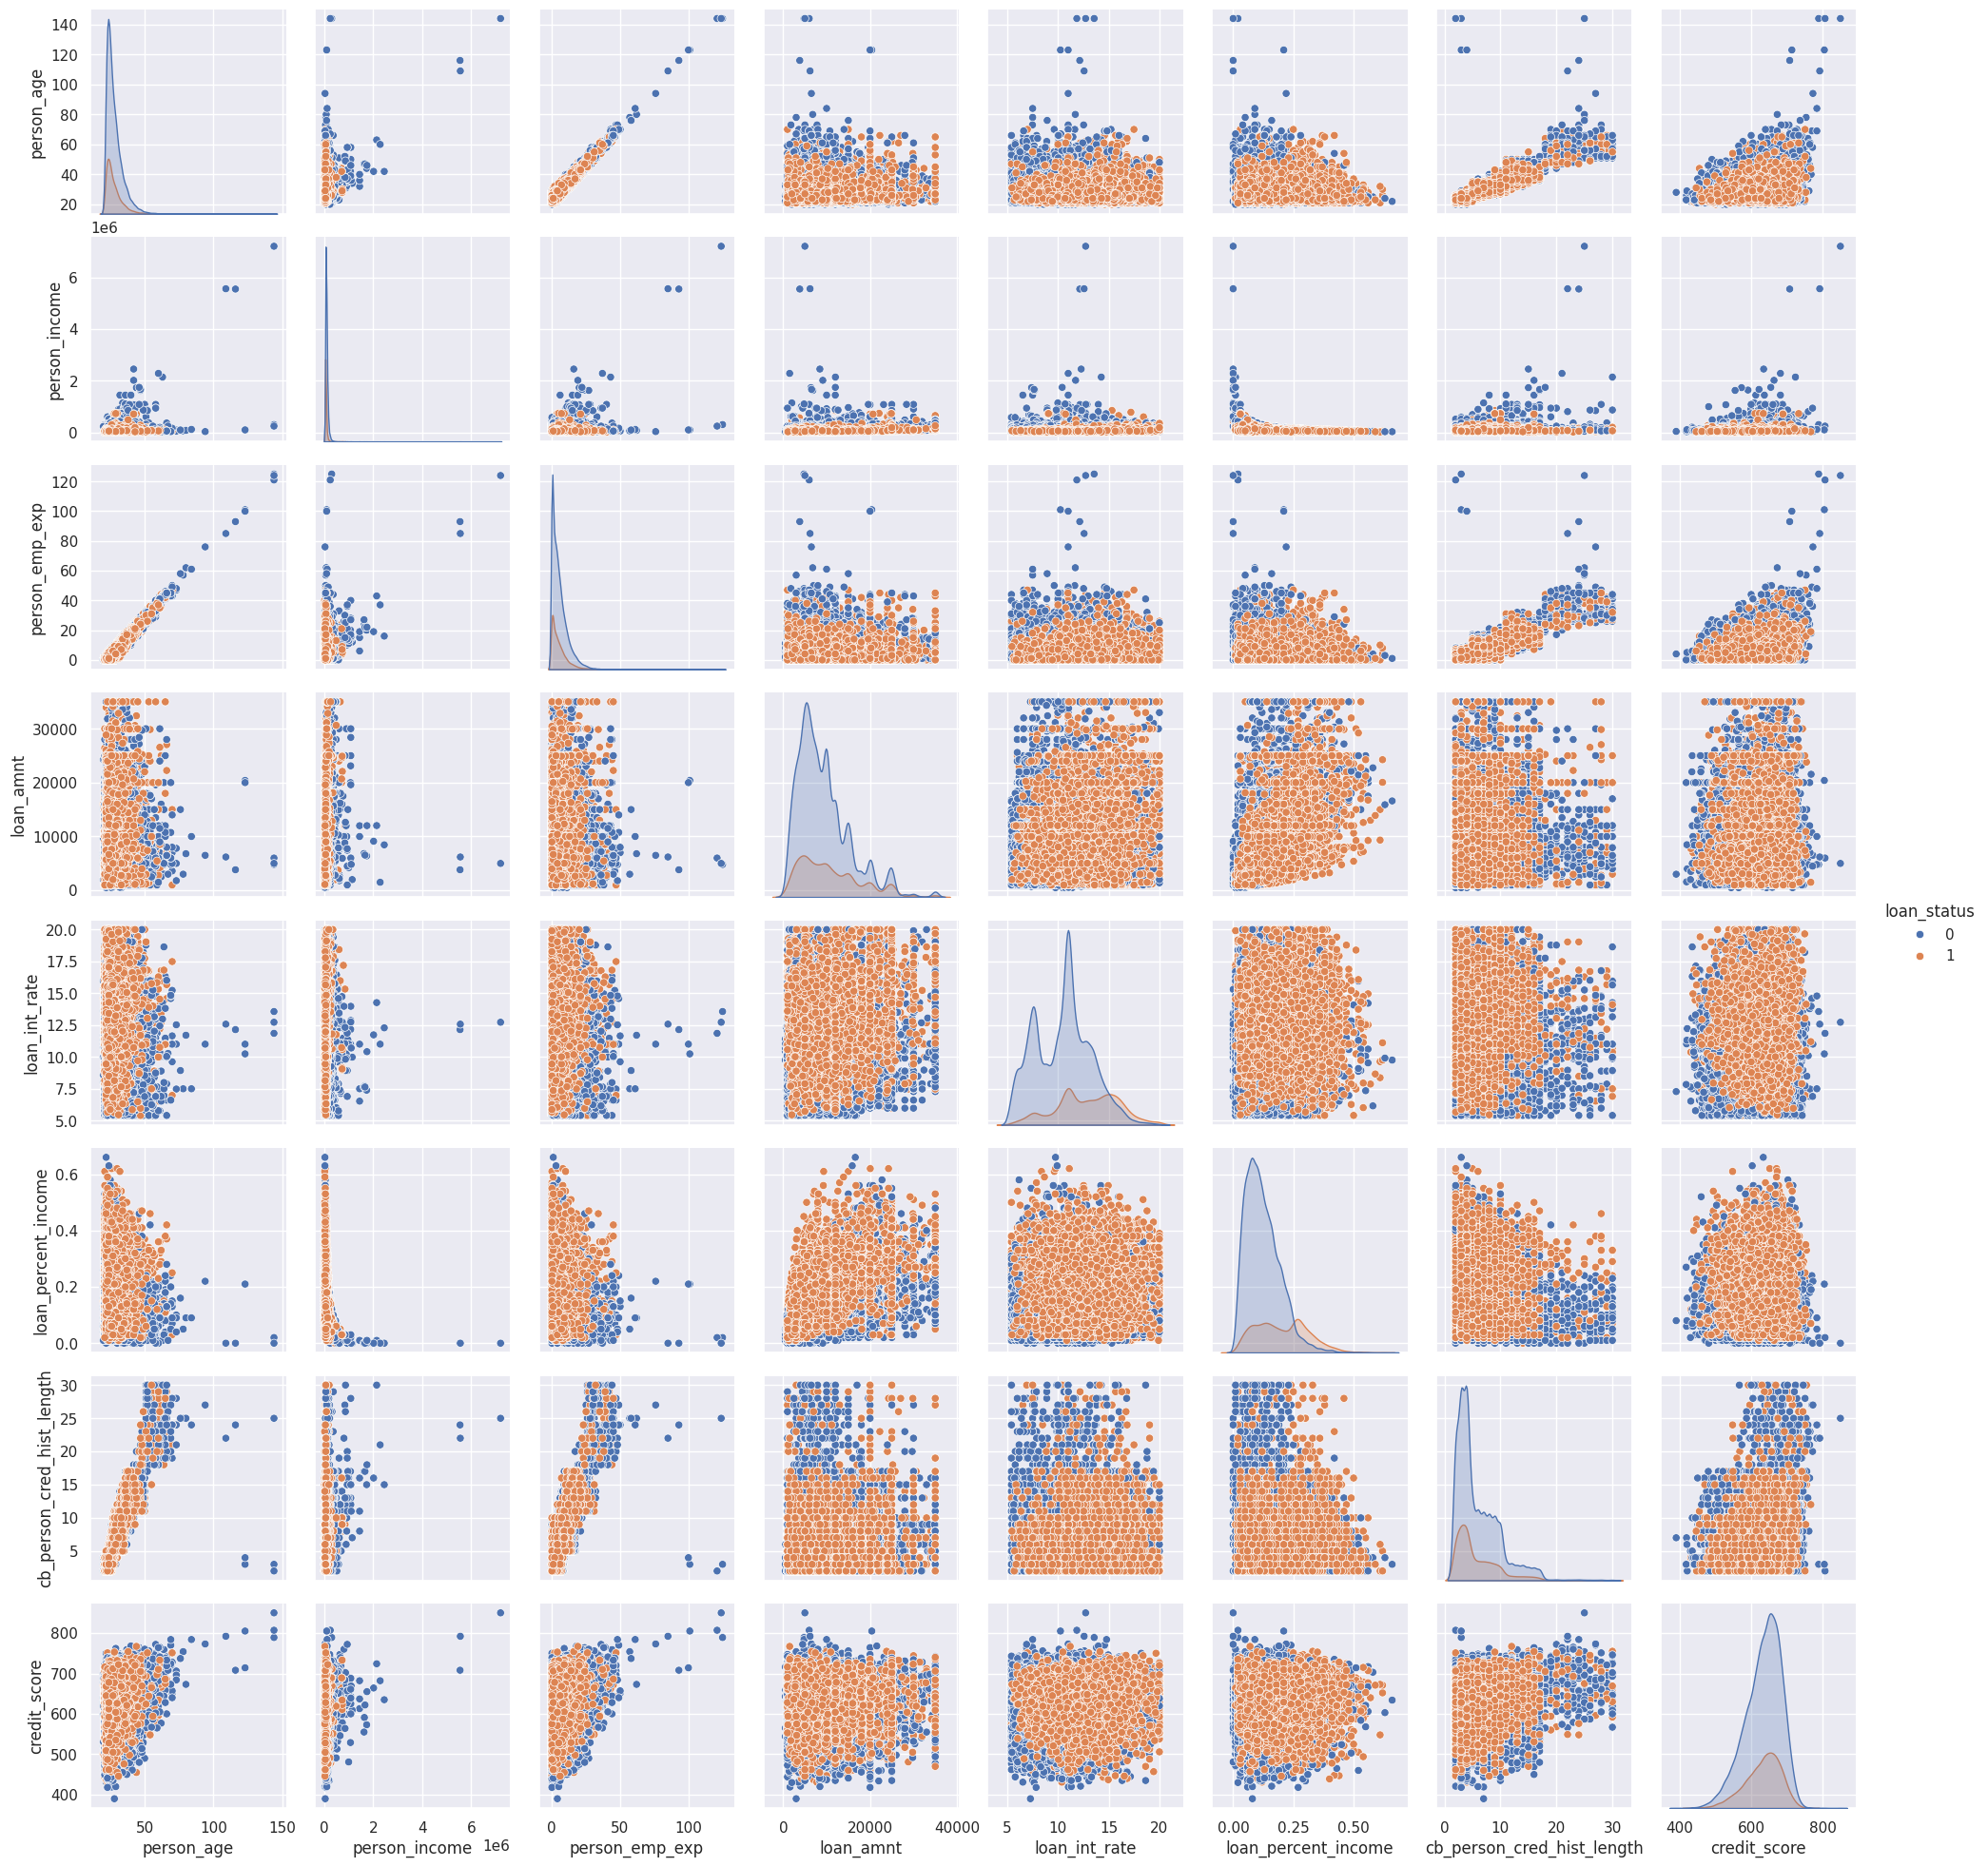

In [31]:
# Pairplot
sns.pairplot(data=df,hue=target);
plt.show();

## Feature Engineering

In [32]:
# import libraries

# preprocessing
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder, OneHotEncoder

# scaling
from sklearn.preprocessing import StandardScaler

### Handling Outliers

Filtering variables for person_age and person_emp_exp.

For person_age, only include ages 90 and below.

In [33]:
df = df.loc[df['person_age']<=90]
df.shape

(44992, 14)

For person_emp_exp, only include years of employment experience less than or equal to 60 years

In [34]:
df = df.loc[df['person_emp_exp']<=60]
df.shape

(44990, 14)

### Feature Encoding

Transforming categorical features to numerical

Binarize 'person_gender' where '0' represents a 'female'.

In [35]:
# create a copy of the data
df_copy = df.copy().reset_index()

In [36]:
# binarize the person_gender feature
lb = LabelBinarizer()
df['person_gender'] = lb.fit_transform(df['person_gender'])
df.head()

person_age  person_gender person_education  person_income  person_emp_exp  \
0        22.0              0           Master        71948.0               0   
1        21.0              0      High School        12282.0               0   
2        25.0              0      High School        12438.0               3   
3        23.0              0         Bachelor        79753.0               0   
4        24.0              1           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

Ordinal encoding for 'person_education'. The levels of education from lowest to highest is as follows: high school, associate, bachelor, master, doctorate

In [37]:
# unique values of person_education
np.unique(df.person_education)

array(['Associate', 'Bachelor', 'Doctorate', 'High School', 'Master'],
      dtype=object)

In [38]:
# ordinal encoding for 'person_education'
oe = OrdinalEncoder(categories=[['High School','Associate','Bachelor','Master','Doctorate']])
df['person_education'] = oe.fit_transform(df[['person_education']])
df.head()

person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0               3.0        71948.0               0   
1        21.0              0               0.0        12282.0               0   
2        25.0              0               0.0        12438.0               3   
3        23.0              0               2.0        79753.0               0   
4        24.0              1               3.0        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [39]:
# unique values of person_home_ownership
np.unique(df.person_home_ownership)

array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object)

One-hot encoding for 'person_home_ownership'.

In [40]:
# one hot-encoding of person_home_ownership, dropping 'OTHER'
ohe = OneHotEncoder(categories=[['OTHER', 'OWN', 'RENT', 'MORTGAGE']], drop='first', sparse_output=False)
ohe.fit(df[['person_home_ownership']])
encoded_home_ownership = ohe.transform(df[['person_home_ownership']])
encoded_home_ownership = pd.DataFrame(encoded_home_ownership, columns=ohe.get_feature_names_out())
new_features = ohe.get_feature_names_out().tolist()
df = pd.concat([df.drop('person_home_ownership', axis=1).reset_index(drop=True), encoded_home_ownership], axis=1)
df.head()

person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0               3.0        71948.0               0   
1        21.0              0               0.0        12282.0               0   
2        25.0              0               0.0        12438.0               3   
3        23.0              0               2.0        79753.0               0   
4        24.0              1               3.0        66135.0               1   

   loan_amnt loan_intent  loan_int_rate  loan_percent_income  \
0    35000.0    PERSONAL          16.02                 0.49   
1     1000.0   EDUCATION          11.14                 0.08   
2     5500.0     MEDICAL          12.87                 0.44   
3    35000.0     MEDICAL          15.23                 0.44   
4    35000.0     MEDICAL          14.27                 0.53   

   cb_person_cred_hist_length  credit_score previous_loan_defaults_on_file  \
0                         3.0           561                             No   
1                         2.0           504                            Yes   
2                         3.0           635                             No   
3                         2.0           675                             No   
4                         4.0           586                             No   

   loan_status  person_home_ownership_OWN  person_home_ownership_RENT  \
0            1                        0.0                         1.0   
1            0                        1.0                         0.0   
2            1                        0.0                         0.0   
3            1                        0.0                         1.0   
4            1                        0.0                         1.0   

   person_home_ownership_MORTGAGE  
0                             0.0  
1                             0.0  
2                             1.0  
3                             0.0  
4                             0.0

In [41]:
# unique features of loan_intent without dropping any features
np.unique(df.loan_intent)

array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
       'PERSONAL', 'VENTURE'], dtype=object)

In [42]:
# one-hot-encoding of loan_intent
ohe = OneHotEncoder(categories=[['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
       'PERSONAL', 'VENTURE']], sparse_output=False)
encoded_loan_intent = ohe.fit_transform(df[['loan_intent']])
encoded_loan_intent = pd.DataFrame(encoded_loan_intent, columns=ohe.get_feature_names_out())
new_features += ohe.get_feature_names_out().tolist()
df = pd.concat([df.drop('loan_intent',axis=1).reset_index(drop=True), encoded_loan_intent], axis=1)
df.head()

person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0               3.0        71948.0               0   
1        21.0              0               0.0        12282.0               0   
2        25.0              0               0.0        12438.0               3   
3        23.0              0               2.0        79753.0               0   
4        24.0              1               3.0        66135.0               1   

   loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0    35000.0          16.02                 0.49                         3.0   
1     1000.0          11.14                 0.08                         2.0   
2     5500.0          12.87                 0.44                         3.0   
3    35000.0          15.23                 0.44                         2.0   
4    35000.0          14.27                 0.53                         4.0   

   credit_score  ... loan_status  person_home_ownership_OWN  \
0           561  ...           1                        0.0   
1           504  ...           0                        1.0   
2           635  ...           1                        0.0   
3           675  ...           1                        0.0   
4           586  ...           1                        0.0   

   person_home_ownership_RENT  person_home_ownership_MORTGAGE  \
0                         1.0                             0.0   
1                         0.0                             0.0   
2                         0.0                             1.0   
3                         1.0                             0.0   
4                         1.0                             0.0   

   loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
0                            0.0                    0.0   
1                            0.0                    1.0   
2                            0.0                    0.0   
3                            0.0                    0.0   
4                            0.0                    0.0   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                          0.0                  0.0                   1.0   
1                          0.0                  0.0                   0.0   
2                          0.0                  1.0                   0.0   
3                          0.0                  1.0                   0.0   
4                          0.0                  1.0                   0.0   

   loan_intent_VENTURE  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 21 columns]

In [43]:
# binarize 'previous_loan_defaults_on_file'
lb = LabelBinarizer()
df['previous_loan_defaults_on_file'] = lb.fit_transform(df['previous_loan_defaults_on_file'])
df.head()

person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0               3.0        71948.0               0   
1        21.0              0               0.0        12282.0               0   
2        25.0              0               0.0        12438.0               3   
3        23.0              0               2.0        79753.0               0   
4        24.0              1               3.0        66135.0               1   

   loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0    35000.0          16.02                 0.49                         3.0   
1     1000.0          11.14                 0.08                         2.0   
2     5500.0          12.87                 0.44                         3.0   
3    35000.0          15.23                 0.44                         2.0   
4    35000.0          14.27                 0.53                         4.0   

   credit_score  ...  loan_status  person_home_ownership_OWN  \
0           561  ...            1                        0.0   
1           504  ...            0                        1.0   
2           635  ...            1                        0.0   
3           675  ...            1                        0.0   
4           586  ...            1                        0.0   

   person_home_ownership_RENT  person_home_ownership_MORTGAGE  \
0                         1.0                             0.0   
1                         0.0                             0.0   
2                         0.0                             1.0   
3                         1.0                             0.0   
4                         1.0                             0.0   

   loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
0                            0.0                    0.0   
1                            0.0                    1.0   
2                            0.0                    0.0   
3                            0.0                    0.0   
4                            0.0                    0.0   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                          0.0                  0.0                   1.0   
1                          0.0                  0.0                   0.0   
2                          0.0                  1.0                   0.0   
3                          0.0                  1.0                   0.0   
4                          0.0                  1.0                   0.0   

   loan_intent_VENTURE  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 21 columns]

In [44]:
# inspect new feature names
print(df.columns)

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'person_home_ownership_MORTGAGE', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')


In [45]:
# number of features after encoding
print(f'The number of features for the encoded dataset is {df.drop(target, axis=1).shape[1]}')

The number of features for the encoded dataset is 20


In [46]:
# update categorical_features with the new features generated from encoding
categorical_features_new = categorical_features.copy()
categorical_features_new += new_features
renamed_features = ['person_home_ownership','loan_intent']
for feature in renamed_features:
    categorical_features_new.remove(feature)

In [47]:
# encoded feature names
feature_names_enc = df.drop(target, axis=1).columns.tolist()

### Feature Scaling

Standardizing numerical features

In [48]:
# standardizing the numerical features
std_scaler = StandardScaler()
df[numerical_features] = std_scaler.fit_transform(df[numerical_features])
df.head()

person_age  person_gender  person_education  person_income  person_emp_exp  \
0   -0.975222              0               3.0      -0.125718       -0.912694   
1   -1.144987              0               0.0      -1.067968       -0.912694   
2   -0.465927              0               0.0      -1.065505       -0.404745   
3   -0.805457              0               2.0      -0.002461       -0.912694   
4   -0.635692              1               3.0      -0.217517       -0.743378   

   loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0   4.024870       1.682942             4.016448                   -0.739616   
1  -1.359211       0.044810            -0.684999                   -0.997749   
2  -0.646612       0.625541             3.443101                   -0.739616   
3   4.024870       1.417752             3.443101                   -0.997749   
4   4.024870       1.095497             4.475125                   -0.481484   

   credit_score  ...  loan_status  person_home_ownership_OWN  \
0     -1.420381  ...            1                        0.0   
1     -2.551473  ...            0                        1.0   
2      0.048055  ...            1                        0.0   
3      0.841804  ...            1                        0.0   
4     -0.924287  ...            1                        0.0   

   person_home_ownership_RENT  person_home_ownership_MORTGAGE  \
0                         1.0                             0.0   
1                         0.0                             0.0   
2                         0.0                             1.0   
3                         1.0                             0.0   
4                         1.0                             0.0   

   loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
0                            0.0                    0.0   
1                            0.0                    1.0   
2                            0.0                    0.0   
3                            0.0                    0.0   
4                            0.0                    0.0   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                          0.0                  0.0                   1.0   
1                          0.0                  0.0                   0.0   
2                          0.0                  1.0                   0.0   
3                          0.0                  1.0                   0.0   
4                          0.0                  1.0                   0.0   

   loan_intent_VENTURE  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 21 columns]

# Model Fitting

In [177]:
# import libraries

# model selection
from sklearn.model_selection import train_test_split, StratifiedKFold
# feature selection
from sklearn.feature_selection import RFECV
# dummy
from sklearn.dummy import DummyClassifier
# logistic regression
from sklearn.linear_model import LogisticRegression
# ensemble models
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
# trees
from sklearn.tree import DecisionTreeClassifier
# model selection
from sklearn.model_selection import GridSearchCV
# metrics
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score
# inspection
from sklearn.inspection import permutation_importance

## Data Splitting

In [50]:
# store data to X and y variables
X = df.drop(target, axis=1)
y = df[target].values

In [55]:
# split to 70% train, 15% validation, and 15% test data. Split is stratified by y. Use a random_state of 1
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1, stratify=y)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, train_size=0.5, random_state=1, stratify=y_test)

In [57]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((31492, 20), (31492,), (6749, 20), (6749,))

## Baseline Classifier

In [ ]:
# create a dummy classifier with random_state=1 and strategy = 'uniform'
clf_d = DummyClassifier(random_state=1, strategy='uniform')
clf_d.fit(X_train, y_train)

DummyClassifier(random_state=1, strategy='uniform')

In [ ]:
# predict with the test data
y_pred_dummy = clf_d.predict(X_test)

In [ ]:
# score
print(classification_report(y_test,y_pred_dummy))

# f1 score
print(f'{f1_score(y_test,y_pred_dummy):.2f}')

              precision    recall  f1-score   support

           0       0.78      0.50      0.61      6998
           1       0.22      0.49      0.30      2000

    accuracy                           0.50      8998
   macro avg       0.50      0.50      0.46      8998
weighted avg       0.65      0.50      0.54      8998

0.30


## Logistic Regression

In [ ]:
# create a LogisticRegression model
clf_logistic = LogisticRegression(penalty='l2', tol=1e-4, class_weight='balanced', n_jobs=-2, max_iter=1000)

### Feature Selection

In [ ]:
# feature selection object
rfe = RFECV(estimator=clf_logistic,cv=5,scoring='f1',n_jobs=-2)

In [ ]:
# fit
rfe.fit(X_train,y_train)

# number of selected features
print(f'Number of selected features: {rfe.n_features_}')

Number of selected features: 15


In [ ]:
# index of selected features
idx = rfe.support_

In [ ]:
# selected features
display(X_train.columns[idx].to_list())

['person_income',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'credit_score',
 'previous_loan_defaults_on_file',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'person_home_ownership_MORTGAGE',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE']

In [ ]:
# transform train and test data with the selected features
X_train_rfe = X_train[X_train.columns[idx]]
X_test_rfe = X_test[X_test.columns[idx]]

### Fitting

In [ ]:
# tuning parameters
param_grid = {
    'C':[1,10,100],
    'solver':['lbfgs','liblinear','sag','saga']
}

Cross-validation of LogisticRegression

In [ ]:
# cross-validation
gs = GridSearchCV(estimator=clf_logistic, param_grid=param_grid, scoring='f1', n_jobs=-2, cv=5)
gs.fit(X_train_rfe,y_train)

C:\Users\anaconda3\envs\LoanApproval\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 11.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, n_jobs=-2),
             n_jobs=-2,
             param_grid={'C': [1, 10, 100],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='f1')

In [ ]:
# best estimator
gs.best_estimator_

LogisticRegression(C=100, class_weight='balanced', max_iter=1000, n_jobs=-2,
                   solver='liblinear')

In [ ]:
# best parameters
gs.best_params_

{'C': 100, 'solver': 'liblinear'}

In [ ]:
# predict with the best estimator
clf_logistic=gs.best_estimator_
y_pred_logistic = clf_logistic.predict(X_test_rfe)

In [ ]:
# score
print(classification_report(y_test,y_pred_logistic))

# f1 score
print(f'{f1_score(y_test,y_pred_logistic):.2f}')

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      6998
           1       0.62      0.92      0.74      2000

    accuracy                           0.86      8998
   macro avg       0.80      0.88      0.82      8998
weighted avg       0.89      0.86      0.87      8998

0.74


## Random Forest

In [ ]:
# create a RandomForestClassifier object
clf_rf = RandomForestClassifier(random_state=1, bootstrap=True, oob_score=f1_score, class_weight='balanced')

### Feature Selection

In [ ]:
# feature selection object
rfe = RFECV(estimator=clf_rf,cv=5,scoring='f1',n_jobs=-2)

In [ ]:
# fit
rfe.fit(X_train,y_train)

# number of selected features
print(f'Number of selected features: {rfe.n_features_}')

Number of selected features: 20


In [ ]:
# index of selected features
idx = rfe.support_

In [ ]:
# selected features
display(X_train.columns[idx].to_list())

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'person_home_ownership_MORTGAGE',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE']

In [ ]:
# transform train and test data with the selected features
X_train_rfe = X_train[X_train.columns[idx]]
X_test_rfe = X_test[X_test.columns[idx]]

### Fitting

##### Cross-validation of RF model

In [ ]:
# tuning parameters
param_grid = {
    'n_estimators' : [100,300,500],
    'max_depth': [None, 6, 9],
    'max_features' : ['sqrt','log2',None],
    'ccp_alpha': [0,0.01,0.05],
}

In [ ]:
# cross-validation
gs = GridSearchCV(clf_rf, param_grid, n_jobs=-2, cv=5, scoring='f1')
gs.fit(X_train_rfe,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              oob_score=<function f1_score at 0x000001D2122A8E00>,
                                              random_state=1),
             n_jobs=-2,
             param_grid={'ccp_alpha': [0, 0.01, 0.05],
                         'max_depth': [None, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 300, 500]},
             scoring='f1')

In [ ]:
# best estimator
gs.best_estimator_

RandomForestClassifier(ccp_alpha=0, class_weight='balanced', n_estimators=300,
                       oob_score=<function f1_score at 0x000001D2122A8E00>,
                       random_state=1)

In [ ]:
# best parameters
gs.best_params_

{'ccp_alpha': 0,
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [ ]:
# fit a RandomForestClassifier model with the best estimators obtained from the GridSearchCV
clf_rf = gs.best_estimator_
y_pred_rf_tuned = clf_rf.predict(X_test_rfe)

In [ ]:
# score of the RandomForestClassifier model with the tuned hyper-parameters
print(classification_report(y_test,y_pred_rf_tuned))

# f1 score
print(f'{f1_score(y_test,y_pred_rf_tuned):.2f}')

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6998
           1       0.90      0.76      0.82      2000

    accuracy                           0.93      8998
   macro avg       0.92      0.87      0.89      8998
weighted avg       0.93      0.93      0.93      8998

0.82


## GradientBoosting

For the Gradient boosting model, we will use HistGradientBoostingClassifier since it is suggested for datasets with more than 10,000 samples for ease in computation.

In [ ]:
# convert the data type of the categorical features to category
X_train[categorical_features_new]=X_train[categorical_features_new].astype('category')

In [ ]:
# create a HistGradientBoostingClassifier
clf_hgb = HistGradientBoostingClassifier(random_state=1, early_stopping=True, validation_fraction=0.1, tol=1e-4,scoring='loss', categorical_features='from_dtype')

### Feature Selection

In [ ]:
# define a class with a fit method
class perm_importance(HistGradientBoostingClassifier):
    def fit(self, X,y):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, shuffle=True
        )
        super().fit(X_train,y_train)

        self.perm_feature_importances_ = permutation_importance(
            self, X_test, y_test,
            n_repeats=5, random_state=42,
        )['importances_mean']

        return super().fit(X,y)

In [ ]:
# define estimator
estimator = perm_importance(random_state=1, early_stopping=True, validation_fraction=0.1, tol=1e-4,scoring='loss', categorical_features='from_dtype')

In [ ]:
# feature selection object
rfe = RFECV(estimator=estimator,cv=5,scoring='f1',n_jobs=-2, importance_getter='perm_feature_importances_')

In [ ]:
# fit
rfe.fit(X_train,y_train)

# number of selected features
print(f'Number of selected features: {rfe.n_features_}')

Number of selected features: 12


In [ ]:
# index of selected features
idx_gb = rfe.support_

In [ ]:
# selected features
display(X_train.columns[idx_gb].to_list())

['person_age',
 'person_income',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'credit_score',
 'previous_loan_defaults_on_file',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL']

In [ ]:
# transform train and test data with the selected features
X_train_rfe = X_train[X_train.columns[idx_gb]]
X_test_rfe = X_test[X_test.columns[idx_gb]]

### Fitting

Cross-validation of HistGradientBoostingClassifer

In [ ]:
# tuning parameters
parameter_grid ={
    'max_iter':[100,200,300],
    'learning_rate': [0.05,0.1,0.15],
    'l2_regularization':[0,0.001,0.01],
    'max_depth':[None,3,6,9],
    'class_weight':[None,'balanced'],
    'max_features':[1.0,np.round((np.sqrt(X_train_rfe.shape[1])/np.sqrt(X_train_rfe.shape[1])),1)],
}

In [ ]:
# cross-validation
gs = GridSearchCV(estimator=clf_hgb,param_grid=parameter_grid,n_jobs=-2,cv=5, scoring='f1')
gs.fit(X_train_rfe,y_train)

GridSearchCV(cv=5,
             estimator=HistGradientBoostingClassifier(categorical_features='from_dtype',
                                                      early_stopping=True,
                                                      random_state=1,
                                                      tol=0.0001),
             n_jobs=-2,
             param_grid={'class_weight': [None, 'balanced'],
                         'l2_regularization': [0, 0.001, 0.01],
                         'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [None, 3, 6, 9],
                         'max_features': [1.0, 1.0],
                         'max_iter': [100, 200, 300]},
             scoring='f1')

In [ ]:
# best estimator
gs.best_estimator_

HistGradientBoostingClassifier(categorical_features='from_dtype',
                               early_stopping=True, l2_regularization=0.001,
                               learning_rate=0.15, max_depth=6, max_iter=200,
                               random_state=1, tol=0.0001)

In [ ]:
# best parameters
gs.best_params_

{'class_weight': None,
 'l2_regularization': 0.001,
 'learning_rate': 0.15,
 'max_depth': 6,
 'max_features': 1.0,
 'max_iter': 200}

In [ ]:
# fit a HistGradientBoostingClassifier with the best estimators obtained from the GridSearchCV
clf_hgb = gs.best_estimator_

In [ ]:
# prediction using the best estimator
y_pred_hgb = clf_hgb.predict(X_test_rfe)

In [ ]:
# score
print(classification_report(y_pred_hgb, y_test))

# f1-score
print(f1_score(y_pred_hgb,y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      7223
           1       0.80      0.90      0.84      1775

    accuracy                           0.93      8998
   macro avg       0.88      0.92      0.90      8998
weighted avg       0.94      0.93      0.94      8998

0.8434437086092715


Plot of errors vs number of iterations for the best HistGradientBoostingClassifier model

In [ ]:
# get number of iterations
n_iter=gs.best_estimator_.n_iter_

In [ ]:
# boosting errors data frame
validation_errors = pd.DataFrame(
    {
        'Number of iterations':range(0, n_iter+1),
        'errors': gs.best_estimator_.validation_score_
    }

).set_index('Number of iterations')

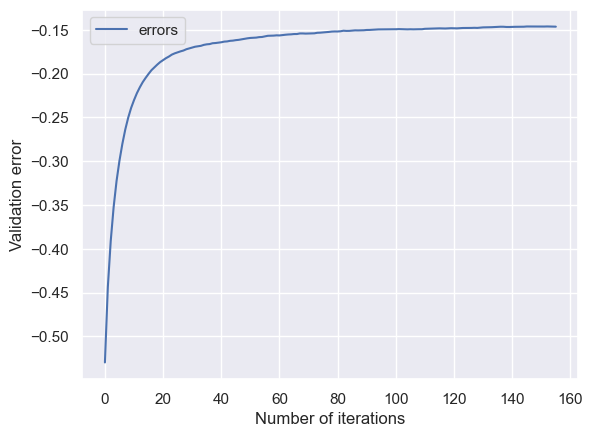

In [ ]:
# plot of validation errors vs no. of iterations
ax = validation_errors.plot()
ax.set_ylabel('Validation error')
plt.show()

## AdaBoost

In [ ]:
# create an AdaBoostClassifier model
clf_ab = AdaBoostClassifier(random_state=1, algorithm='SAMME',)

### Feature Selection

In [ ]:
# feature selection object
rfe = RFECV(estimator=clf_ab,cv=5,scoring='f1',n_jobs=-2)

In [ ]:
# fit
rfe.fit(X_train,y_train)

# number of selected features
print(f'Number of selected features: {rfe.n_features_}')

Number of selected features: 10


In [ ]:
# index of selected features
idx = rfe.support_

In [ ]:
# selected features
display(X_train.columns[idx].to_list())

['person_income',
 'loan_int_rate',
 'loan_percent_income',
 'credit_score',
 'previous_loan_defaults_on_file',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE']

In [ ]:
# transform train and test data with the selected features
X_train_rfe = X_train[X_train.columns[idx]]
X_test_rfe = X_test[X_test.columns[idx]]

### Fitting

In [ ]:
# tuning parameters
param_grid = {
    'estimator':[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=5)],
    'n_estimators' : [50,300,500],
    'learning_rate' : [0.1,1,3],
}

In [ ]:
# cross validation with GridSearchCV
gs = GridSearchCV(estimator=clf_ab, param_grid=param_grid, n_jobs=-2, cv=5, scoring='f1')
gs.fit(X_train_rfe, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME', random_state=1),
             n_jobs=-2,
             param_grid={'estimator': [DecisionTreeClassifier(max_depth=1),
                                       DecisionTreeClassifier(max_depth=3),
                                       DecisionTreeClassifier(max_depth=5)],
                         'learning_rate': [0.1, 1, 3],
                         'n_estimators': [50, 300, 500]},
             scoring='f1')

In [ ]:
# best estimator
gs.best_estimator_

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=1, n_estimators=500, random_state=1)

In [ ]:
# best parameters
gs.best_params_

{'estimator': DecisionTreeClassifier(max_depth=5),
 'learning_rate': 1,
 'n_estimators': 500}

In [ ]:
# fit a AdaBoostClassifier with the best estimators obtained from the GridSearchCV
clf_ab = gs.best_estimator_
# predict using the best estimator
y_pred_ab = clf_ab.predict(X_test_rfe)

In [ ]:
# score
print(classification_report(y_pred_ab, y_test))

# f1-score
print(f1_score(y_pred_ab,y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      7178
           1       0.79      0.87      0.83      1820

    accuracy                           0.93      8998
   macro avg       0.88      0.91      0.89      8998
weighted avg       0.93      0.93      0.93      8998

0.8287958115183246


Plot of the misclassification error vs number of trees for the AdaBoostClassifier

In [ ]:
# number of estimators
n_estimators= len(gs.best_estimator_.estimators_)

In [ ]:
# function to calculate the misclassification error
def misclassification_error(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

In [ ]:
# boostin errors dataframe
boosting_errors = pd.DataFrame(
    {
        'Number of trees':range(1, n_estimators+1),
        'errors': [misclassification_error(y_test,y_pred) for y_pred in clf_ab.staged_predict(X_test_rfe)]
    }
).set_index('Number of trees');

C:\Users\anaconda3\envs\LoanApproval\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


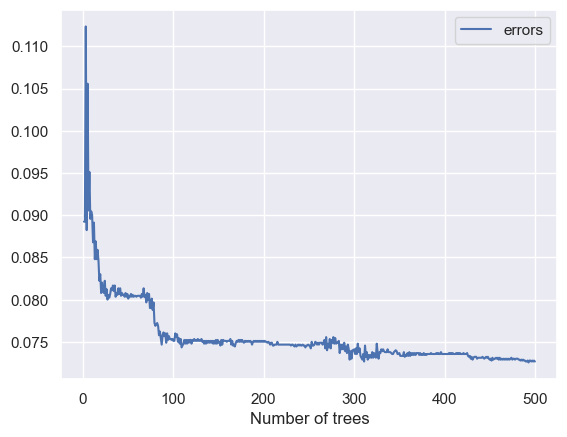

In [ ]:
# plot of the boosting errors
ax = boosting_errors.plot()
plt.show()

## Feature Importances

In [ ]:
# features
features = clf_logistic.feature_names_in_

Coefficients for logistic regression

In [ ]:
# linear model coefficients
coefs = pd.Series(clf_logistic.coef_[0], index=features)

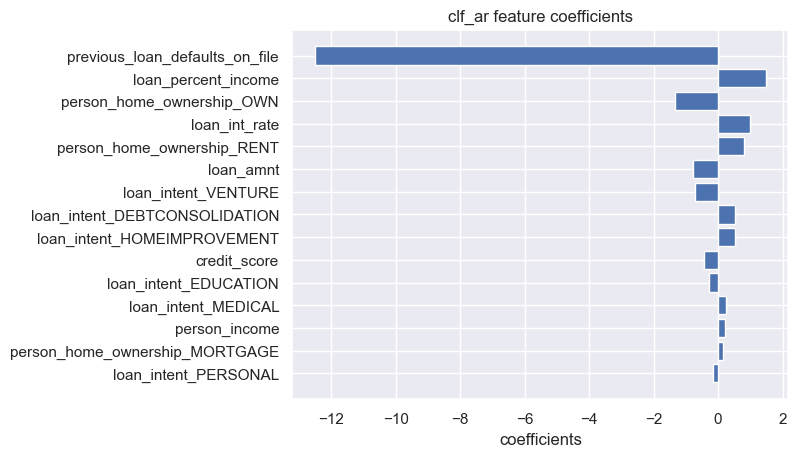

In [ ]:
# sorting index
idx_sort = np.argsort(np.abs(coefs))

# plot
plt.barh(y=[coefs.keys().to_list()[i] for i in idx_sort],width=coefs.iloc[idx_sort]);
plt.title('clf_ar feature coefficients');
plt.xlabel('coefficients');
plt.show();

Feature Importances

In [ ]:
classification_models = [clf_rf,clf_ab]
model_names = ['clf_rf','clf_ab']

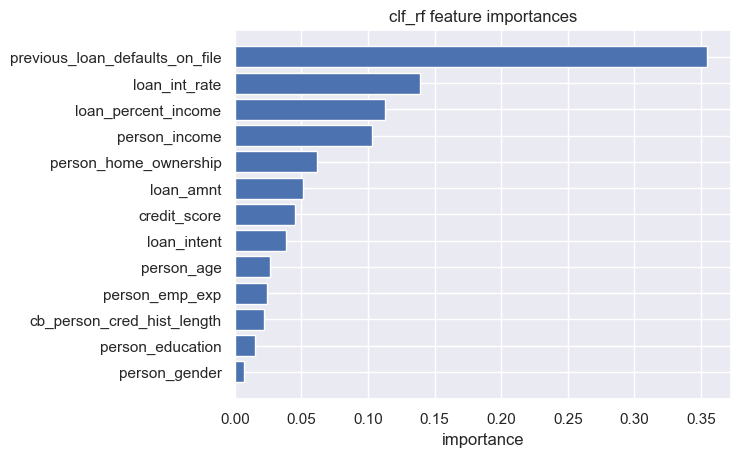

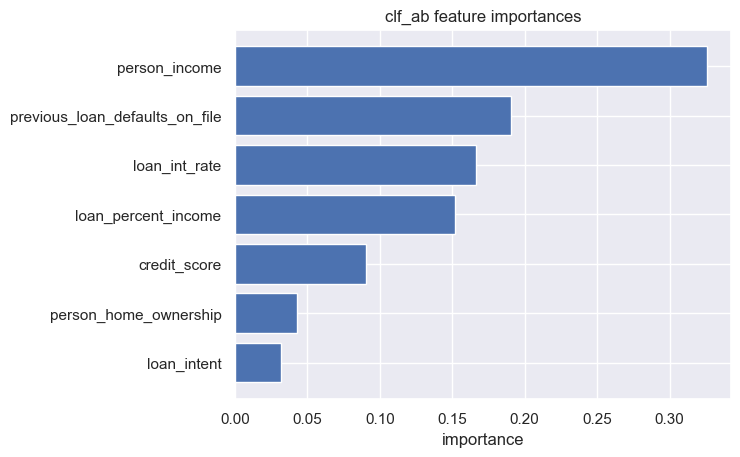

In [ ]:
# feature importances
for model, model_name in zip(classification_models,model_names):
    imp = pd.Series(model.feature_importances_, index=model.feature_names_in_)
    # merge features
    features = model.feature_names_in_
    for feature in categorical_features:
        # boolean index to match each categorical feature in the new features
        idx = [(feature in i) for i in imp.keys().to_list()]
        # summed mean of importances
        imp_sum = imp[idx].sum()
        imp = imp[np.logical_not(idx)]
        if np.any([(feature in i) for i in features]):
            imp[feature] = imp_sum

    # sorting index
    idx_sort = np.argsort(imp)

    # plot
    plt.barh(y=[imp.keys().to_list()[i] for i in idx_sort],width=imp.iloc[idx_sort]);
    plt.title(f'{model_name} feature importances');
    plt.xlabel('importance');
    plt.show();

Permutation importances for HistGradientBoostingClassifier

In [ ]:
# Permutation importance
result = permutation_importance(clf_hgb, X_test[X_test.columns[idx_gb]], y_test, n_repeats=5, n_jobs=-2, random_state=1)
hgb_importances = pd.Series(result.importances_mean, index=clf_hgb.feature_names_in_)
hgb_std = pd.Series(result.importances_std, index=clf_hgb.feature_names_in_)

In [ ]:
features= clf_hgb.feature_names_in_

In [ ]:
# sum the importances for the renamed features
for feature in categorical_features:
    idx = [(feature in i) for i in hgb_importances.keys().tolist()]

    importances_sum = hgb_importances[idx].sum()
    hgb_importances = hgb_importances[np.logical_not(idx)]
    hgb_importances[feature] = importances_sum
    if np.any([(feature in i) for i in features]):
        imp[feature] = imp_sum

    importances_std = np.sqrt((hgb_std[idx]**2).sum())
    hgb_std = hgb_std[np.logical_not(idx)]
    hgb_std[feature] = importances_std

In [ ]:
# sorting index based on feature importance
idx_sort = np.argsort(hgb_importances)

Plot of feature importances for the HistGradientBoostingClassifier

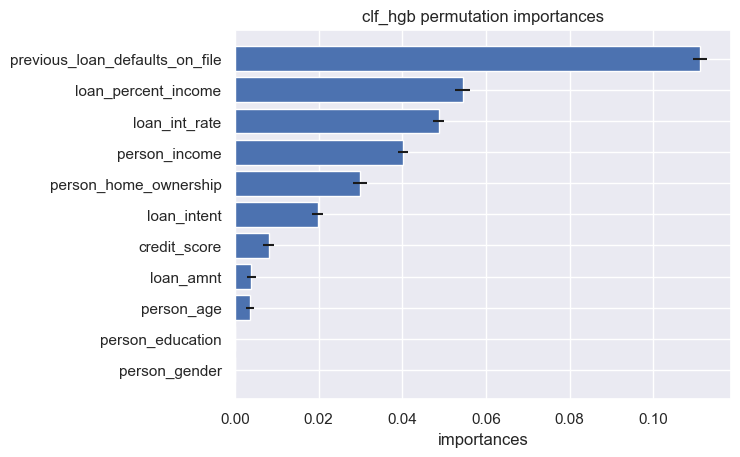

In [ ]:
# plot of feature importances
fig, ax = plt.subplots()
ax.barh(y=[hgb_importances.keys().tolist()[i] for i in idx_sort], width=hgb_importances.iloc[idx_sort], xerr=hgb_std.iloc[idx_sort])
ax.set_xlabel('importances');
ax.set_title('clf_hgb permutation importances');
plt.show();

# Summary

Summary of models

In [ ]:
models = ['DummyClassifier','LogisticRegression','RandomForestClassifier','HistGradientBoostingClassifier','AdaBoostClassifier']
y_preds = [y_pred_dummy,y_pred_logistic,y_pred_rf_tuned,y_pred_hgb,y_pred_ab]
accuracy_scores = [accuracy_score(y_test,y_pred) for y_pred in y_preds]
recall_scores = [recall_score(y_test,y_pred) for y_pred in y_preds]
precision_scores = [precision_score(y_test,y_pred) for y_pred in y_preds]
f1_scores = [f1_score(y_test,y_pred) for y_pred in y_preds]

In [ ]:
summary=[]
for i, model in enumerate(models):
    summary_model={
        'Model':model,
        'Accuracy':accuracy_scores[i],
        'Recall':recall_scores[i],
        'Precision':precision_scores[i],
        'F1 score':f1_scores[i]
    }
    summary.append(summary_model)

In [ ]:
display(pd.DataFrame(summary))

Model  Accuracy  Recall  Precision  F1 score
0                 DummyClassifier  0.499555  0.4925   0.220210  0.304341
1              LogisticRegression  0.857857  0.9170   0.622328  0.741459
2          RandomForestClassifier  0.927651  0.7615   0.897466  0.823911
3  HistGradientBoostingClassifier  0.934319  0.7960   0.896901  0.843444
4              AdaBoostClassifier  0.927317  0.7915   0.869780  0.828796

# Training with Neural Network

In [459]:
# import libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

In [460]:
# import ray tune for hyperparameter tuning
try:
  import ray
except ImportError:
  !pip install ray
  import ray

from ray import tune, train
from ray.train import Checkpoint
from ray.air import RunConfig
from ray.tune.schedulers import ASHAScheduler

In [461]:
# import other helper libraries
import os
import joblib
import tempfile

## Data Loading as Tensors

In [462]:
# assign device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [463]:
# def load_data function that will load the datasets as tensors
def load_data(X_train, X_validation, X_test, y_train, y_validation, y_test, device):

  # convert dataframes and numpy arrays to tensors
  X_train = torch.tensor(X_train.values, dtype=torch.float32, device=device)
  X_validation = torch.tensor(X_validation.values, dtype=torch.float32, device=device)
  X_test = torch.tensor(X_test.values, dtype=torch.float32, device=device)
  y_train = torch.tensor(y_train, dtype=torch.float32, device=device)
  y_validation = torch.tensor(y_validation, dtype=torch.float32, device=device)
  y_test = torch.tensor(y_test, dtype=torch.float32, device=device)

  # create tensor datasets
  train_dataset = data.TensorDataset(X_train, y_train)
  validation_dataset = data.TensorDataset(X_validation, y_validation)
  test_dataset = data.TensorDataset(X_test, y_test)

  return train_dataset, validation_dataset, test_dataset


In [464]:
# load datasets
train_dataset, validation_dataset, test_dataset = load_data(X_train, X_validation, X_test, y_train, y_validation, y_test, device)

## Defining the Neural Network

In [465]:
# input size (features)
input_size = X_train.shape[-1]
print(input_size)

20


In [466]:
# define the neural network architecture

class ClassificationNet(nn.Module):
    def __init__(self, input_size = 20, l1=8, l2=16, dropout_rate=0.2):
      super().__init__()

      self.fc1 = nn.Linear(input_size, l1) # first fully connected layer
      self.dropout1 = nn.Dropout(p=dropout_rate) # first dropout layer
      self.fc2 = nn.Linear(l1, l2) # second fully connected layer
      self.dropout2 = nn.Dropout(p=dropout_rate) # second dropout layer
      self.fc3 = nn.Linear(l2,1) # final fully connected layer; 1 output corresponding to loan approval
      self.sigmoid = nn.Sigmoid() # layer converting the output to a probability

    def forward(self, x):
      x = F.relu(self.fc1(x))
      x = self.dropout1(x)
      x = F.relu(self.fc2(x))
      x = self.dropout2(x)
      x = self.fc3(x) # output layer
      x = self.sigmoid(x) # conversion of output layer to a probability

      return x

## Train Function

In [467]:
# define a train function
def train_func(model, optimizer, train_loader, device, epoch):
  model.train()

  # initialize values
  running_loss = 0
  train_loss = 0
  f1score = 0
  total_accuracy = 0
  batch_data_points = 0
  total_data_points = 0
  all_labels = []
  all_predictions = []

  # iterate through batches
  for batch_idx, data in enumerate(train_loader):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    # reset gradient to 0
    optimizer.zero_grad()

    # criterion
    criterion = nn.BCELoss()

    # forward
    prediction_probas = model(inputs).squeeze(1)
    predictions = torch.where(prediction_probas >= 0.5, 1., 0.) # convert the probability to class prediction

    # accumulate all labels and predictions
    all_predictions.extend(predictions.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

    # loss
    loss = criterion(prediction_probas, labels)

    # backward
    loss.backward()

    # optimize
    optimizer.step()

    # monitor running loss (for the mini-batch)
    running_loss += loss.item() * len(inputs)

    # monitor data points for the batch
    batch_data_points += len(inputs)

    # monitor total_data points
    total_data_points += len(inputs)

    # output statistics every 200 mini-batches
    if batch_idx+1 % 200 == 0:
          print(f'[{epoch+1}, {batch_idx+1}] loss: {running_loss/batch_data_points}')

          # reset monitoring values
          running_loss = 0
          batch_data_points = 0

    # monitor total train_loss
    train_loss += loss * len(inputs)

    # average loss
    average_loss = train_loss / total_data_points

  # f1 score
  f1score = f1_score(all_labels,all_predictions)

  return f1score

## Test Function

In [468]:
# define a test function
def test_func(model, optimizer, test_loader, device):
  model.eval()

  # initialize values
  all_predictions = []
  all_labels = []
  f1score = 0

  # iterate through batches
  for batch_idx, data in enumerate(test_loader):
    with torch.no_grad():
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)

      # predictions
      prediction_probas = model(inputs).squeeze(1)
      predictions = torch.where(prediction_probas >= 0.5, 1., 0.) # convert the probability to class prediction

      # accumulate labels and predictions
      all_predictions.extend(predictions.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())

  # f1 score
  f1score = f1_score(all_labels, all_predictions)

  return f1score

## Train Loop

In [469]:
# define training loop
def train_loanapproval(config, train_dataset, validation_dataset, test_dataset):
  # device
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  # dataloaders
  train_loader = data.DataLoader(train_dataset, batch_size=config['batch_size'], num_workers=2)
  validation_loader = data.DataLoader(validation_dataset, batch_size=config['batch_size'], num_workers=2)
  test_loader = data.DataLoader(test_dataset, batch_size=config['batch_size'], num_workers=2)

  # define model
  model = ClassificationNet(input_size=20, l1=config['l1'], l2=config['l2'], dropout_rate=config['dropout_rate'])
  model.to(device)

  # define optimizer
  optimizer = torch.optim.Adam(params=model.parameters(), lr=config['lr'])

  # train loop
  for epoch in range(5):
    train_func(model=model, optimizer=optimizer, train_loader=train_loader, device=device, epoch=epoch)
    # evaluation on validation set
    validation_f1score = test_func(model=model, optimizer=optimizer, test_loader=validation_loader, device=device)

    # create checkpoint
    with tempfile.TemporaryDirectory() as temp_checkpoint_dir:
      checkpoint = None

      # save current state_dict (checkpoint)
      torch.save(
          model.state_dict(),
          os.path.join(temp_checkpoint_dir, 'model.pth')
          )

      # load checkpoint from saved file
      checkpoint = Checkpoint.from_directory(temp_checkpoint_dir)

      # report to ray tune the f1 score with the associated checkpoint after each epoch
      train.report({'f1score':validation_f1score}, checkpoint=checkpoint)

  print('Finished Training')


## Hyperparameter Tuning

In [470]:
# defining the search space
search_space = {
    'l1' : tune.choice([2**i for i in range(3,9)]),
    'l2' : tune.choice([2**i for i in range(3,9)]),
    'dropout_rate': tune.choice(np.arange(0.2, 1.0, 0.2)),
    'batch_size': tune.choice([2**i for i in range(4,7)]),
    'lr' : tune.loguniform(1e-4,1e-3)
}

# define tuner
tuner = tune.Tuner(
    trainable = tune.with_parameters(train_loanapproval, train_dataset=train_dataset, validation_dataset=validation_dataset, test_dataset=test_dataset),
    param_space = search_space,
    tune_config = tune.TuneConfig(mode='max', metric='f1score', num_samples=3)
)

# execute hyperparameter tuning
results = tuner.fit()

2025-01-15 14:11:36,221	WARNING callback.py:136 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


+---------------------------------------------------------------------------+
| Configuration for experiment     train_loanapproval_2025-01-15_14-11-36   |
+---------------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator                    |
| Scheduler                        FIFOScheduler                            |
| Number of trials                 3                                        |
+---------------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_loanapproval_2025-01-15_14-11-36

Trial status: 3 PENDING
Current time: 2025-01-15 14:11:36. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+-------------------------------------------------------------------------------------------------------+
| Trial name                       status       l1     l2     dropout_rate     batch_size            lr |
+-----------------------------

(train_loanapproval pid=68964) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-15_14-11-36/train_loanapproval_a17cf_00000_0_batch_size=64,dropout_rate=0.4000,l1=128,l2=8,lr=0.0004_2025-01-15_14-11-36/checkpoint_000000)



Trial status: 2 RUNNING | 1 PENDING
Current time: 2025-01-15 14:12:06. Total running time: 30s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: a17cf_00000 with f1score=0.7416232315711094 and params={'l1': 128, 'l2': 8, 'dropout_rate': 0.4, 'batch_size': 64, 'lr': 0.00042581983209061513}
+-----------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status       l1     l2     dropout_rate     batch_size            lr     iter     total time (s)     f1score |
+-----------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_a17cf_00000   RUNNING     128      8              0.4             64   0.00042582         1            9.48361    0.741623 |
| train_loanapproval_a17cf_00001   RUNNING      16     64              0.8             16   0.000657509       

(train_loanapproval pid=68964) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-15_14-11-36/train_loanapproval_a17cf_00000_0_batch_size=64,dropout_rate=0.4000,l1=128,l2=8,lr=0.0004_2025-01-15_14-11-36/checkpoint_000001)
(train_loanapproval pid=68964) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-15_14-11-36/train_loanapproval_a17cf_00000_0_batch_size=64,dropout_rate=0.4000,l1=128,l2=8,lr=0.0004_2025-01-15_14-11-36/checkpoint_000002)
(train_loanapproval pid=68964) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-15_14-11-36/train_loanapproval_a17cf_00000_0_batch_size=64,dropout_rate=0.4000,l1=128,l2=8,lr=0.0004_2025-01-15_14-11-36/checkpoint_000003) [repeated 2x across cluster]



Trial train_loanapproval_a17cf_00000 completed after 5 iterations at 2025-01-15 14:12:25. Total running time: 49s
+-------------------------------------------------------------------+
| Trial train_loanapproval_a17cf_00000 result                       |
+-------------------------------------------------------------------+
| checkpoint_dir_name                             checkpoint_000004 |
| time_this_iter_s                                          5.88607 |
| time_total_s                                             33.31341 |
| training_iteration                                              5 |
| f1score                                                   0.79388 |
+-------------------------------------------------------------------+
(train_loanapproval pid=68964) Finished Training


(train_loanapproval pid=68964) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-15_14-11-36/train_loanapproval_a17cf_00000_0_batch_size=64,dropout_rate=0.4000,l1=128,l2=8,lr=0.0004_2025-01-15_14-11-36/checkpoint_000004)



Trial status: 1 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2025-01-15 14:12:36. Total running time: 1min 0s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: a17cf_00000 with f1score=0.793876824492702 and params={'l1': 128, 'l2': 8, 'dropout_rate': 0.4, 'batch_size': 64, 'lr': 0.00042581983209061513}
+-------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         l1     l2     dropout_rate     batch_size            lr     iter     total time (s)     f1score |
+-------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_a17cf_00001   RUNNING        16     64              0.8             16   0.000657509        1            24.5683    0.637681 |
| train_loanapproval_a17cf_00000   TERMINATED    128      8              0.4        

(train_loanapproval pid=68962) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-15_14-11-36/train_loanapproval_a17cf_00001_1_batch_size=16,dropout_rate=0.8000,l1=16,l2=64,lr=0.0007_2025-01-15_14-11-36/checkpoint_000001)
(train_loanapproval pid=69378) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-15_14-11-36/train_loanapproval_a17cf_00002_2_batch_size=64,dropout_rate=0.8000,l1=64,l2=128,lr=0.0002_2025-01-15_14-11-36/checkpoint_000000)
(train_loanapproval pid=69378) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-15_14-11-36/train_loanapproval_a17cf_00002_2_batch_size=64,dropout_rate=0.8000,l1=64,l2=128,lr=0.0002_2025-01-15_14-11-36/checkpoint_000001)
(train_loanapproval pid=69378) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_20


Trial status: 1 TERMINATED | 2 RUNNING
Current time: 2025-01-15 14:13:06. Total running time: 1min 30s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: a17cf_00000 with f1score=0.793876824492702 and params={'l1': 128, 'l2': 8, 'dropout_rate': 0.4, 'batch_size': 64, 'lr': 0.00042581983209061513}
+-------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         l1     l2     dropout_rate     batch_size            lr     iter     total time (s)     f1score |
+-------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_a17cf_00001   RUNNING        16     64              0.8             16   0.000657509        3            69.6784    0.780326 |
| train_loanapproval_a17cf_00002   RUNNING        64    128              0.8             64   0

(train_loanapproval pid=69378) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-15_14-11-36/train_loanapproval_a17cf_00002_2_batch_size=64,dropout_rate=0.8000,l1=64,l2=128,lr=0.0002_2025-01-15_14-11-36/checkpoint_000004) [repeated 2x across cluster]
(train_loanapproval pid=68962) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-15_14-11-36/train_loanapproval_a17cf_00001_1_batch_size=16,dropout_rate=0.8000,l1=16,l2=64,lr=0.0007_2025-01-15_14-11-36/checkpoint_000003)
2025-01-15 14:13:30,400	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/train_loanapproval_2025-01-15_14-11-36' in 0.0103s.



Trial train_loanapproval_a17cf_00001 completed after 5 iterations at 2025-01-15 14:13:30. Total running time: 1min 54s
+-------------------------------------------------------------------+
| Trial train_loanapproval_a17cf_00001 result                       |
+-------------------------------------------------------------------+
| checkpoint_dir_name                             checkpoint_000004 |
| time_this_iter_s                                          11.1955 |
| time_total_s                                             97.93453 |
| training_iteration                                              5 |
| f1score                                                    0.7743 |
+-------------------------------------------------------------------+

Trial status: 3 TERMINATED
Current time: 2025-01-15 14:13:30. Total running time: 1min 54s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
Current best trial: a17cf_00000 with f1score=0.793876824492702 and params={'l1': 128, 'l2': 8, 'dropout_rate': 0.